In [14]:

from MCTS import MCT
from env import Env
from modell import Net
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import os



In [2]:
net=Net(3*6,4)

k_scram=2.0



100%|██████████| 3000/3000 [12:59<00:00,  3.85it/s]


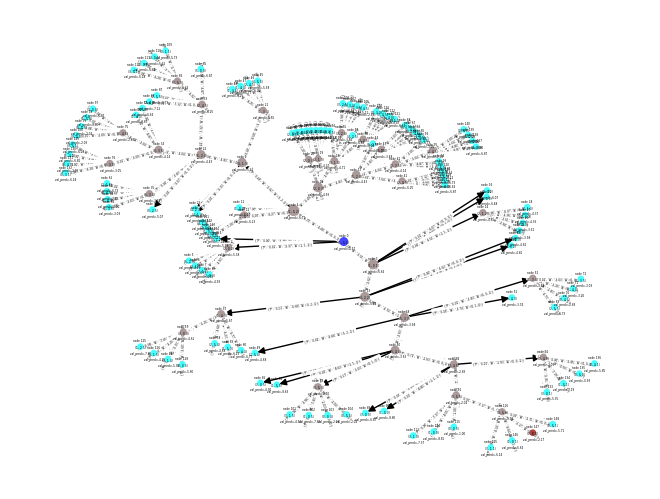

k_scram =222.79999999999112
{'x': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]]), 'value_tgt': tensor([-1., -2., -3., -4., -5., -6., -7., -8.]), 'policy_tgt': tensor([[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]]), 'weight': tensor([1.0

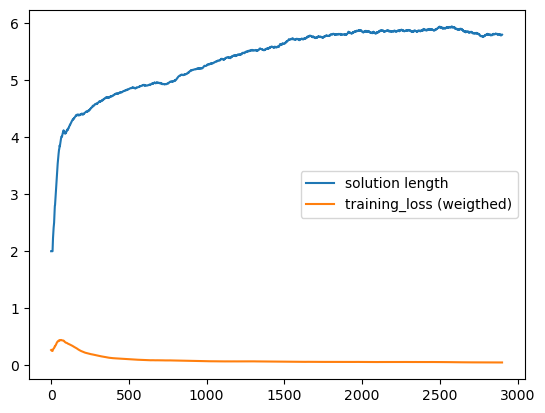

In [3]:
%config InlineBackend.figure_formats = ['png']
plt.rcParams["figure.dpi"]=100
max_tree_size=450

scram_inc=0.1
scram_dec=0.7
k_scram=min(k_scram,200)
#net.clear_History()
iterarations=3000

net.train_buffer_size=800
for i in tqdm(range(iterarations)):
    k_scram=max(k_scram,1)
    tree=MCT(modell=net,Env=Env,c_param=100,viLoss_param=0.0,k_scramble=int(k_scram))
    solved_state=None
    for u in range(max_tree_size):

        solved_state=tree.update()
        if solved_state is not None:
            train_data=solved_state.extract_train_data()
            net.fit(train_data,epochs=1,lr=0.0001)
            k_scram+=scram_inc

            break
    else:
        k_scram-=scram_dec

tree.display_tree()
print(f"{k_scram =}")
print(f"{str(train_data)}")

net.plot_History()

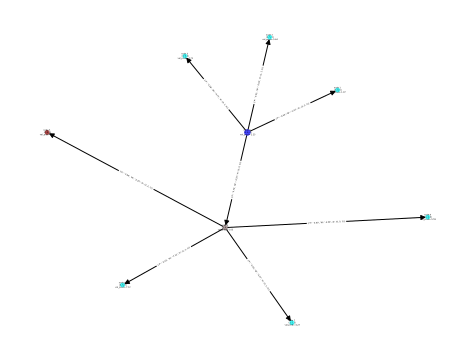

k_scram =223.49999999999108


In [11]:
%config InlineBackend.figure_formats = ['svg']

max_tree_size=450


k=100

tree=MCT(modell=net,Env=Env,c_param=10,viLoss_param=0.0,k_scramble=k)
solved_state=None
for u in range(max_tree_size):

    solved_state=tree.update()
    if solved_state is not None:
        train_data=solved_state.extract_train_data()
        k_scram+=scram_inc

        break
else:
    k_scram-=scram_dec

tree.display_tree()
print(f"{k_scram =}")

In [10]:
train_data

{'x': tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.]]),
 'value_tgt': tensor([-1., -2., -3., -4., -5., -6., -7., -8.]),
 'policy_tgt': tensor([[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]]),
 'weight': tensor([1.0000, 0.5000

In [15]:

name="trained_model"
path=f"models/{name}.pkl"

assert not os.path.isfile(path)

with open(path,"wb") as f:
    pickle.dump(net,f)